In [114]:
#Libraries

from bs4 import BeautifulSoup as soup
import requests
import pandas as pd
import numpy as np
import time
import re

import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
#Get Data from web

URL = "https://listado.mercadolibre.com.ar/notebook#D[A:notebook]"

page = requests.get(URL)
pageSoup = soup(page.content, "html.parser")
#ppageSoup = soup(pageSoup.prettify(), "html.parser")

#print(ppageSoup)

containers = pageSoup.find_all(class_="poly-card poly-card--list")

#print(containers[0])

In [52]:
# Get link link to access the article's listing
links = pageSoup.find_all('a', class_='poly-component__title')

reference_link = []

for link in links:
    reference_link.append(link.get('href'))

#reference_link

In [210]:
## Functions to extract the text once on the article's page

# Get product tittle
def get_title(soupin):
    try:
        title = soupin.find('h1', class_='ui-pdp-title')
        title = title.get_text()
        return title
    except AttributeError:
        return None

# Get product price
def get_price(soupin):
    try:
        price = soupin.find('span', class_='andes-money-amount__fraction')
        price = price.get_text()
        price = int(price.replace('.', ''))
        return price
    except AttributeError:
        return None

# Get product rating
def get_cali(soupin):
    try:
        calification = soupin.find('span', class_='andes-visually-hidden')
        calification = calification.get_text()
        calification = calification[13:16]
        return calification
    except AttributeError:
        return None

# Get product brand
def get_brand(search_data):
    try:
        for brand in search_data:
            brand = brand.get_text()
            if "Marca" in brand:
                brand = brand.replace('Marca','')
                return brand
                break
    except AttributeError:
        return None

# Get product brand series
def get_serie(search_data):
    try:
        for serie in search_data:
            serie = serie.get_text()
            if "Línea" in serie or "Modelo" in serie:
                serie = serie.replace('Línea','')
                serie = serie.replace('Modelo','')
                return serie
                break
    except AttributeError:
        return None

# Get processor model
def get_processor(search_data):
    try:
        for processor in search_data:
            processor = processor.get_text()
            if 'Marca del procesador' in processor:
                brand_pro = processor.replace('Marca del procesador','')
            if 'Línea del procesador' in processor:
                serie_pro = processor.replace('Línea del procesador','')
            if 'Modelo del procesador' in processor:
                model_pro = processor.replace('Modelo del procesador', '')
                try:
                    processor_name = brand_pro+' '+serie_pro+' '+model_pro
                    return processor_name
                except UnboundLocalError:
                    return brand_pro
                break
    except AttributeError:
        return None

# Get grafic card model
def get_graphic(search_data):
    try:
        for graphic in search_data:
            graphic = graphic.get_text()
            if 'Tarjeta gráfica' in graphic:
                graphic = graphic.replace('Tarjeta gráfica', '')
                return graphic
                break
    except AttributeError:
        return None

# Get ram memory capacity
def get_ram(search_data):
    try:
        for ram in search_data:
            ram = ram.get_text()
            if 'Memoria RAM' in ram:
                ram = ram.replace('Memoria RAM', '')
                return ram
                break
    except AttributeError:
        return None

# Get storage capacity, doen't specify if SSD o HDD
def get_storage(search_data):
    try:
        for storage in search_data:
            storage = storage.get_text()
            if 'Capacidad de disco' in storage:
                storage1 = re.sub(r"Capacidad de disco (SSD|HDD)", "", storage)
                return storage1
                break
    except AttributeError:
        return None

# Get screen size (pulgadas)
def get_screen(search_data):
    try:
        for screen in search_data:
            screen = screen.get_text()
            if 'Tamaño de la pantalla' in screen:
                screen = screen.replace('Tamaño de la pantalla', '')
                return screen
                break
    except AttributeError:
        return None

In [168]:
res = requests.get('https://www.mercadolibre.com.ar/netbook-exomate-x5-s1441p-intel-n4020c-4gb-ssd128gb-116-w11-color-gris/p/MLA35101893#polycard_client=search-nordic&wid=MLA1848679454&sid=search&searchVariation=MLA35101893&position=17&search_layout=stack&type=product&tracking_id=3a63c498-a052-4349-8ca8-3628e24835db')
soupinX = soup(res.content, "html.parser")
table_content = soupinX.find('div', class_='ui-vpp-highlighted-specs pl-45 pr-45')
#search_data = table_content.find_all('tr', class_='andes-table__row ui-vpp-striped-specs__row')

print(soupinX)


<!DOCTYPE html>

<html lang="es-AR">
<head><link href="https://www.google-analytics.com" rel="preconnect"/><link href="https://www.google.com" rel="preconnect"/><link href="https://data.mercadolibre.com" rel="preconnect"/><link href="https://http2.mlstatic.com" rel="preconnect"/><link href="https://stats.g.doubleclick.net" rel="preconnect"/><link href="https://analytics.mercadolibre.com.ar" rel="preconnect"/><link href="https://analytics.mercadolibre.com" rel="preconnect"/><link href="https://www.google.com.ar" rel="preconnect"/><script nonce="cnnjpZiOpNe9fjmJMR6GWQ==" type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRBR-766f4fb616d3a2368ce","applicationID":"1588198355","agentToken":null,"applicationTime":451.743324,"transactionName":"bgQDMEcFXkJZBkYNWldOJBxFFlVCSw9BS3J8NU5LRUsKQUoKVhFWTSgFTG4JTHxlPlNJT3hMOzlOVk1qTRlnOQpiUUxdaE8Z","queueTime":0,"ttGuid":"1d969c8882275e23"}; (window.NREUM|

In [170]:
table_content = soupinX.find('div', class_='ui-vpp-highlighted-specs__striped-specs')
print(table_content)

None


In [184]:
# Sometimes work somethings don't
def get_table_content(link):
    attempt, max_attempt, wait_time= 0, 5, 5
    
    while attempt < max_attempt:
        res = requests.get(link)
        soupin = soup(res.content, "html.parser")
        table_content = soupin.find('div', class_='ui-vpp-highlighted-specs__striped-specs')     
        if table_content is None:
            attempt +=1
        else:
            return table_content
            break

In [212]:
table = {
    "Title":[],
    "Brand":[],
    "Series":[],
    "Processor":[],
    "Graphic Card":[],
    "Ram Memory":[],
    "Storage":[],
    "Screen Size":[],
    "Price":[],
    "Calification":[]}

for link in reference_link:
    res = requests.get(link)
    soupin = soup(res.content, "html.parser")
    table_content = get_table_content(link)
 
    try:
        search_data = table_content.find_all('tr', class_='andes-table__row ui-vpp-striped-specs__row')
    except AttributeError:
        continue

    table['Title'].append(get_title(soupin))
    table['Price'].append(get_price(soupin))
    table['Calification'].append(get_cali(soupin))
    table['Brand'].append(get_brand(search_data))
    table['Series'].append(get_serie(search_data))
    table['Processor'].append(get_processor(search_data))
    table['Graphic Card'].append(get_graphic(search_data))
    table['Ram Memory'].append(get_ram(search_data))
    table['Storage'].append(get_storage(search_data))
    table['Screen Size'].append(get_screen(search_data))
    
                                 

# for container in containers:
#     title = container.find("h2", class_="ui-search-item__title shops__item-title").get_text()
#     title = title.strip()
#     price = container.find("span", class_="andes-money-amount__fraction").get_text()
#     price = price.strip()
    
#     try:
#         califgross = container.find("div", class_="ui-search-reviews ui-search-item__group__element shops__items-group-details").get_text()
#         califgross = califgross.strip()
#         calif = califgross[13:16]

#     except AttributeError:
#         calif = " "
#     #print(container)
    
#     d["Title"].append(title)
#     d["Price"].append(price)
#     d["Calification"].append(calif)
    
    

# MercadoLibredf = pd.DataFrame.from_dict(d)
# MercadoLibredf = MercadoLibredf.where(pd.notnull(MercadoLibredf), " ")
# MercadoLibredf['Price'] = MercadoLibredf['Price'].str.replace(".", "").astype(int)
# #print(MercadoLibredf)
# MercadoLibredf.to_csv('MLdf.csv', header=True, index=False)

table

{'Title': ['Notebook Cx Cx30482 Negra 15.6 Intel Core I3 1025g1 8gb De Ram 256gb Ssd Full Hd Intel Graphics 1920x1080px ',
  'Netbook Exomate X5-s1441p Intel N4020c 4gb Ssd128gb 11,6 W11 Color Gris',
  "Notebook Acer Aspire Ryzen 7 5700u 16gb 512gb 15,6' Fhd Gris Color Plateado",
  'Notebook Lenovo Ideapad 1 4gb 128gb 14 Intel Celeron W11 Color Plateado',
  'Apple MacBook Air (13 pulgadas, 2020, Chip M1, 256 GB de SSD, 8 GB de RAM) - Oro - Distribuidor Autorizado',
  'Notebook Exo Q9-3182 Intel I3 12va 8gb Ssd256gb 15,6 W11 Color Gris',
  None,
  'Apple MacBook Air (13 pulgadas, 2020, Chip M1, 256 GB de SSD, 8 GB de RAM) - Plata - Distribuidor Autorizado',
  'Notebook Dell E6430 14  4gb De Ram 320gb Hdd Intel Core I5 (Reacondicionado)',
  'Notebook Inspiron 3525 15.5" color plata 32GB de Ram - 256GB SSD - AMD Ryzen 5',
  'Notebook Asus Vivobook 16 Intel Core I7 1255u 16gb 512gb Ssd Color Negro',
  'Notebook Noblex N14x1010 14.1 Hd Intel Celeron 4gb/128gb Sdd',
  'Notebook X515EA 15.6" 

In [236]:
tableDF = pd.DataFrame(table)
tableDF = tableDF.dropna(subset=['Price'])
table_sort = tableDF.sort_values(by='Price', ascending=True)
table_sort

,Title,Brand,Series,Processor,Graphic Card,Ram Memory,Storage,Screen Size,Price,Calification
1,Netbook Exomate X5-s1441p Intel N4020c 4gb Ssd...,EXO,Mate,Intel Celeron N4020C,UHD Intel® 600,4 GB,128 GB,"11.6 """,499999.0,4.4
11,Notebook Noblex N14x1010 14.1 Hd Intel Celeron...,Noblex,NX14X1010,Intel Celeron N4020C,None,4 GB,128 GB,"14.1 """,545999.0,4.7
43,Notebook Enova 14 Celeron N4020 Ram 4gb Ssd 12...,Enova,Win,None,Integrada,4 GB,128 GB,"14 """,599999.0,4.4
3,Notebook Lenovo Ideapad 1 4gb 128gb 14 Intel C...,Lenovo,IdeaPad,Intel Celeron N4020,Integrated Intel® UHD Graphics 600,4 GB,128 GB,"14 """,605999.0,4.2
14,Notebook Lenovo Pentium Silver N5030 4gb 128gb...,Lenovo,IdeaPad,Intel Pentium Silver N5030,None,4 GB,128 GB,"14 """,609999.0,4.6
23,Notebook Lenovo V14 Ryzen 3 3250u Ram 8gb Ssd ...,Lenovo,V-Series,None,AMD Radeon™ Graphics integrada,8 GB,256 GB,"14 """,848700.0,4.4
28,Notebook Asus Vivobook Go 14 Windows 11 128gb ...,Asus,Vivobook Go 14,None,Intel UHD Graphics 600,4 GB,128 GB,"14 """,927299.0,4.6
0,Notebook Cx Cx30482 Negra 15.6 Intel Core I3 1...,CX,CX 30000,Intel Core i3 1025G1,None,8 GB,256 GB,"15.6 """,927449.0,4.4
17,"Notebook X515EA 15.6"" color slate gray 8GB de ...",Asus,X515EA,Intel Core i3 1115G4,Intel UHD Graphics Xe,8 GB,240 GB,"15.6 """,935999.0,4.7
5,Notebook Exo Q9-3182 Intel I3 12va 8gb Ssd256g...,EXO,SmartPro,Intel Core i3 1215U,None,8 GB,256 GB,"15.6 """,999999.0,4.9


In [ ]:
#Read newly created csv

# df = pd.read_csv('MLdf.csv')

# df.head()

In [ ]:
#Combine all of the above code into one function #####(Old function)######

# def check_price():
    
#     URL = "https://listado.mercadolibre.com.ar/notebook#D[A:notebook]"

#     page = requests.get(URL)
#     pageSoup = soup(page.content, "html.parser")
#     ppageSoup = soup(pageSoup.prettify(), "html.parser")
    
#     containers = ppageSoup.find_all(class_="andes-card ui-search-result shops__cardStyles ui-search-result--core andes-card--flat andes-card--padding-16")
    
#     d = {"Title":[], "Price":[], "Calification":[]}

#     for container in containers:
#         title = container.find("h2", class_="ui-search-item__title shops__item-title").get_text()
#         title = title.strip()
#         price = container.find("span", class_="andes-money-amount__fraction").get_text()
#         price = price.strip()

#         try:
#             califgross = container.find("div", class_="ui-search-reviews ui-search-item__group__element shops__items-group-details").get_text()
#             califgross = califgross.strip()
#             calif = califgross[13:16]

#         except AttributeError:
#             calif = " "

#         d["Title"].append(title)
#         d["Price"].append(price)
#         d["Calification"].append(calif)
        
#     MercadoLibredf = pd.DataFrame.from_dict(d)
#     MercadoLibredf = MercadoLibredf.where(pd.notnull(df), " ")
#     MercadoLibredf['Price'] = MercadoLibredf['Price'].str.replace(".", "").astype(int)
#     MercadoLibredf.to_csv('MLdf.csv', header=True, index=False)


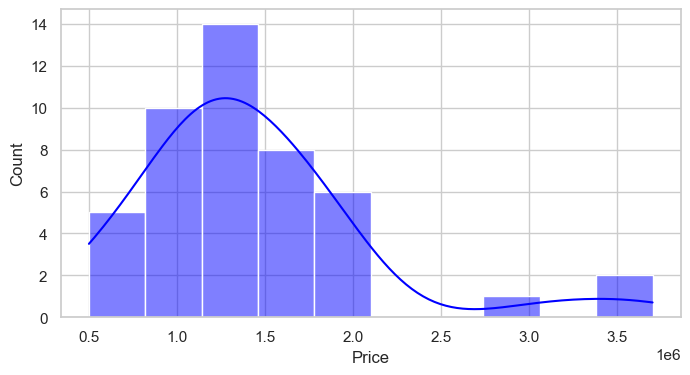

In [266]:
data = table_sort['Price']

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
histplot = sns.histplot(data, bins=10, kde=True, color='blue')